In [28]:
library(arules)
library(arulesViz)

In [29]:
#Read Transactions
groceries <- read.transactions("http://www.sci.csueastbay.edu/~esuess/classes/Statistics_6620/Presentations/ml13/groceries.csv", sep = ",")
summary(groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

In [30]:
#look at the first five transactions
inspect(groceries[1:5])

    items                     
[1] {citrus fruit,            
     margarine,               
     ready soups,             
     semi-finished bread}     
[2] {coffee,                  
     tropical fruit,          
     yogurt}                  
[3] {whole milk}              
[4] {cream cheese,            
     meat spreads,            
     pip fruit,               
     yogurt}                  
[5] {condensed milk,          
     long life bakery product,
     other vegetables,        
     whole milk}              


In [31]:
#examine the frequency of items
itemFrequency(groceries[, 1:3])

abrasive cleaner artif. sweetener   baby cosmetics 
    0.0035587189     0.0032536858     0.0006100661

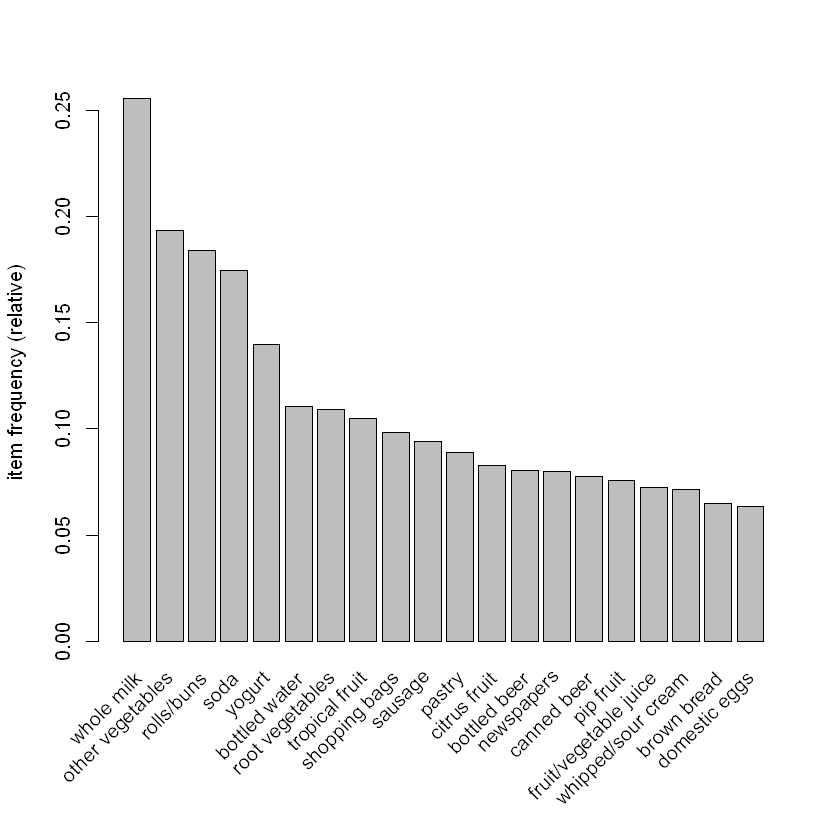

In [32]:
# Top 20 frequencies
itemFrequencyPlot(groceries, topN = 20)

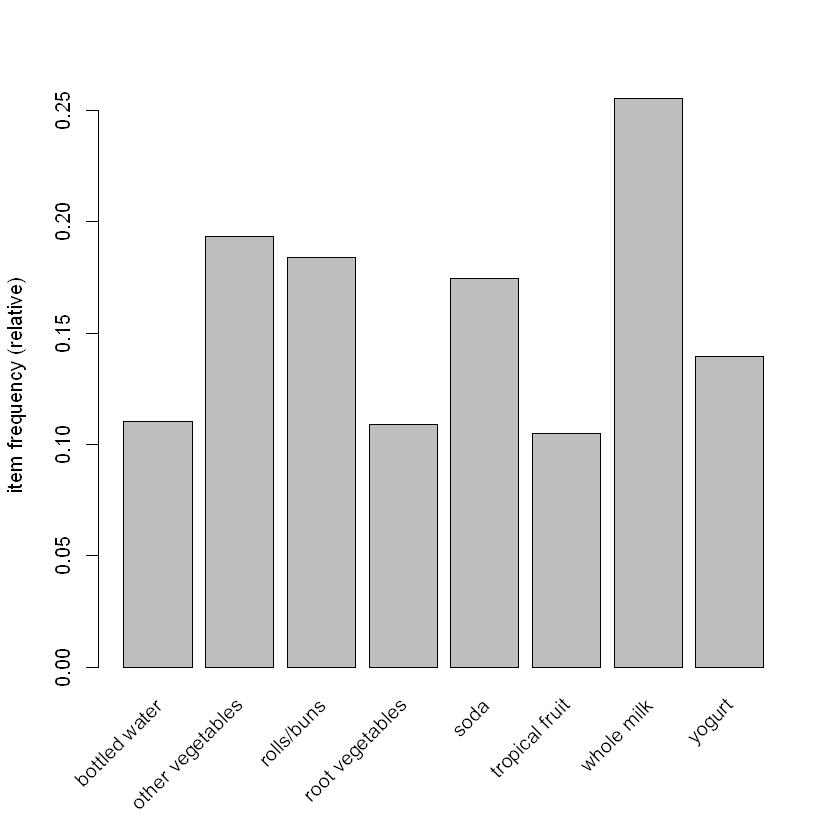

In [33]:
#plot the frequency of items
itemFrequencyPlot(groceries, support = 0.1)

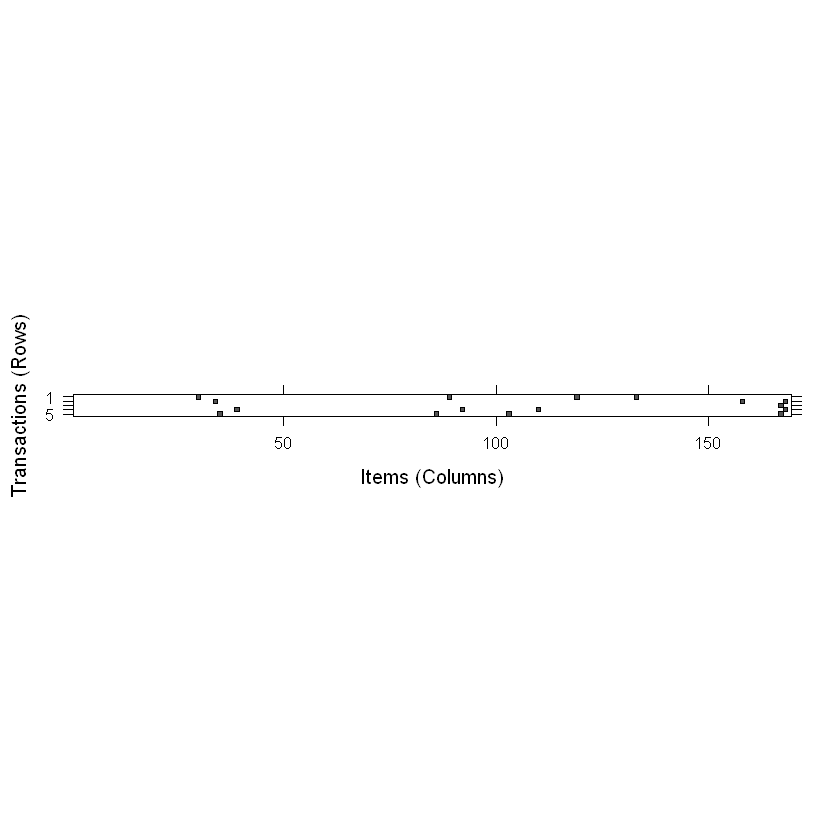

In [34]:
#a visualization of the sparse matrix for the first five transactions
image(groceries[1:5])

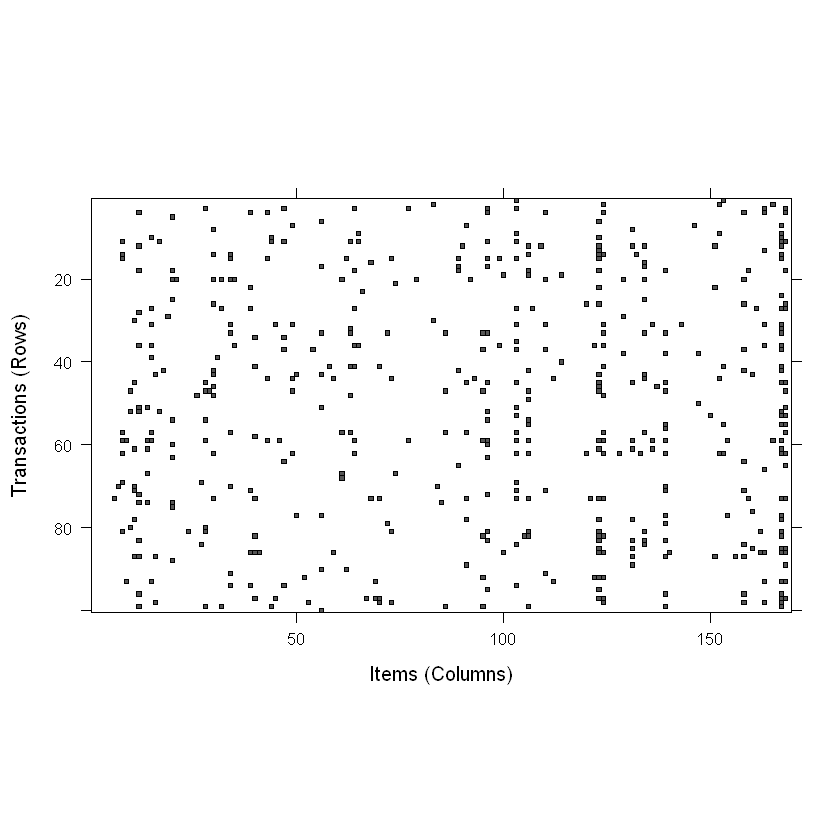

In [35]:
#visualization of a random sample of 100 transactions
image(sample(groceries, 100))

In [42]:
#-------------------------------------------------------------------------
#training a model on the data
#-------------------------------------------------------------------------
#  default settings result in zero rules learned
# apriori(groceries)

#set better support and confidence levels to learn more rules
groceryrules <- apriori(groceries, parameter = list(support =0.006, confidence = 0.25, minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.006      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [109 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [463 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [43]:
# summary of grocery association rules
summary(groceryrules)

set of 463 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 297  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence          lift            count      
 Min.   :0.006101   Min.   :0.2500   Min.   :0.9932   Min.   : 60.0  
 1st Qu.:0.007117   1st Qu.:0.2971   1st Qu.:1.6229   1st Qu.: 70.0  
 Median :0.008744   Median :0.3554   Median :1.9332   Median : 86.0  
 Mean   :0.011539   Mean   :0.3786   Mean   :2.0351   Mean   :113.5  
 3rd Qu.:0.012303   3rd Qu.:0.4495   3rd Qu.:2.3565   3rd Qu.:121.0  
 Max.   :0.074835   Max.   :0.6600   Max.   :3.9565   Max.   :736.0  

mining info:
      data ntransactions support confidence
 groceries          9835   0.006       0.25

In [44]:
#look at the first three rules
inspect(groceryrules[1:3])

    lhs                rhs               support     confidence lift     count
[1] {potted plants} => {whole milk}      0.006914082 0.4000000  1.565460 68   
[2] {pasta}         => {whole milk}      0.006100661 0.4054054  1.586614 60   
[3] {herbs}         => {root vegetables} 0.007015760 0.4312500  3.956477 69   


In [45]:
#--------------------------------------------------------------------
# Model Performance and sorting rules by list 
#--------------------------------------------------------------------
inspect(sort(groceryrules, by = "lift")[1:5])

    lhs                   rhs                      support confidence     lift count
[1] {herbs}            => {root vegetables}    0.007015760  0.4312500 3.956477    69
[2] {berries}          => {whipped/sour cream} 0.009049314  0.2721713 3.796886    89
[3] {other vegetables,                                                              
     tropical fruit,                                                                
     whole milk}       => {root vegetables}    0.007015760  0.4107143 3.768074    69
[4] {beef,                                                                          
     other vegetables} => {root vegetables}    0.007930859  0.4020619 3.688692    78
[5] {other vegetables,                                                              
     tropical fruit}   => {pip fruit}          0.009456024  0.2634561 3.482649    93


In [49]:
#subsetting
berryrules <- subset(groceryrules, items %in% "berries")
inspect(berryrules)

    lhs          rhs                  support     confidence lift     count
[1] {berries} => {whipped/sour cream} 0.009049314 0.2721713  3.796886  89  
[2] {berries} => {yogurt}             0.010574479 0.3180428  2.279848 104  
[3] {berries} => {other vegetables}   0.010269446 0.3088685  1.596280 101  
[4] {berries} => {whole milk}         0.011794611 0.3547401  1.388328 116  


In [50]:
#Writing the rules to a CSV file
write(groceryrules, file = "groceryrules.csv",sep = ",", quote = TRUE, row.names = FALSE)

Warning message in plot.rules(top100rules, method = "graph", interactive = FALSE, :
"The parameter interactive is deprecated. Use engine='interactive' instead."

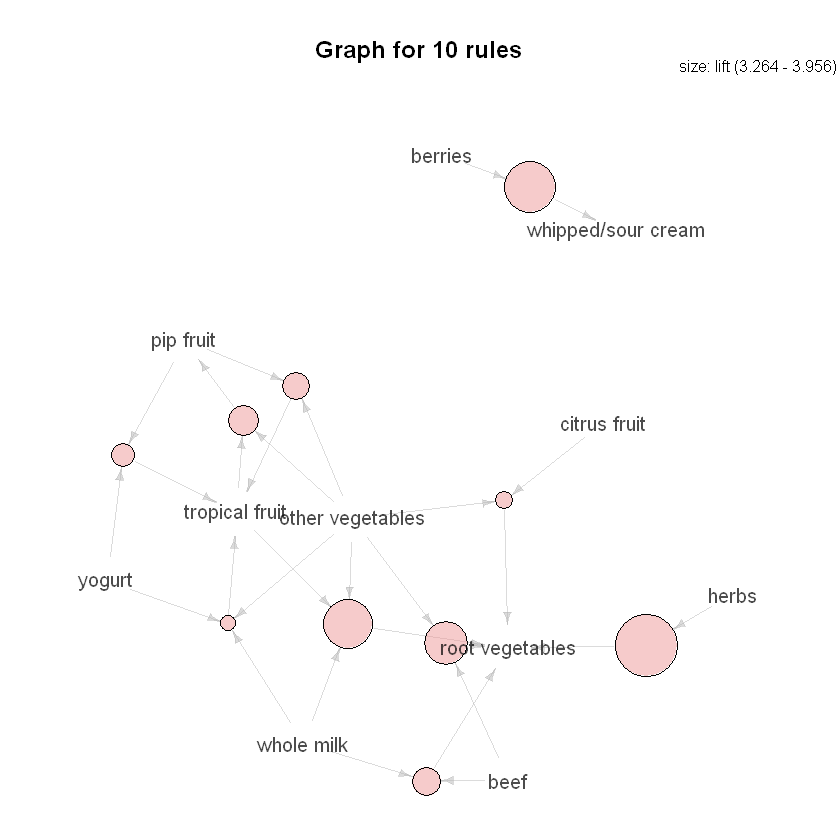

In [71]:
#--------------------------------------------------------------------
#Visualization 
#-------------------------------------------------------------------

library(arules)
#plot(groceryrules,method="graph",interactive=FALSE,shading=NA)
top100rules<-sort(groceryrules, by = "lift")[1:10]
plot(top100rules,method="graph",interactive=FALSE,shading=NA,measure="lift")

In [66]:
#------------------------------------------------------
#In case your data is not like one unique transaction per row , you can use the below logic to convert as transactional.
#from
#T1|P1
#T1|P2
#T1|P3
#T1|P4
#To 
#T1|P1,P2,P3,P4
#------------------------------------------------------
# install.packages('arules')
# library(arules)
# datafraem <- read.csv("Telecom.csv",head=TRUE,sep="," , as.is = T)
# trans <- as(split(datafraem[,2], datafraem[,1]), "transactions")
# summary(trans)
# inspect(trans[1:5])
# itemFrequencyPlot(trans, support = 0.1)
# image(trans[1:2000])